# CNN

In [1]:
# Standard library
import pickle

# Third-party libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# First-party libraries
import network3
from network3 import Network, ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Trying to run under a GPU.  If this is not desired, then modify network3.py
to set the GPU flag to False.


### Carregando o dataset

In [2]:
training_data, validation_data, test_data = network3.load_data_shared()

x_train = np.concatenate((training_data[0].get_value(), validation_data[0].get_value()))
y_train = np.concatenate((training_data[1].eval(), validation_data[1].eval()))
x_test = test_data[0].get_value()
y_test = test_data[1].eval()

### Criando a rede neural

In [3]:
mini_batch_size = 10
cnn = Network([
        ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28), 
                      filter_shape=(20, 1, 5, 5), 
                      poolsize=(2, 2)),
        FullyConnectedLayer(n_in=20*12*12, n_out=100),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)

/home/pedro/.local/lib/python3.10/site-packages/aesara/tensor/special.py:491: FutureWarning: Softmax now accepts an axis argument. For backwards-compatibility it defaults to -1 when not specified, but in the future the default will be `None`.
To suppress this warning specify axis explicitly.
  warnings.warn(
/home/pedro/.local/lib/python3.10/site-packages/aesara/tensor/special.py:491: FutureWarning: Softmax now accepts an axis argument. For backwards-compatibility it defaults to -1 when not specified, but in the future the default will be `None`.
To suppress this warning specify axis explicitly.
  warnings.warn(


### Treinando a rede neural

In [4]:
cnn.SGD(training_data, 10, mini_batch_size, 0.1,
        validation_data, test_data)

Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 94.47%
This is the best validation accuracy to date.
The corresponding test accuracy is 93.80%
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Epoch 1: validation accuracy 96.06%
This is the best validation accuracy to date.
The corresponding test accuracy is 95.74%
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Epoch 2: validation accuracy 97.05%
This is the best validation accuracy to date.
The corresponding test accuracy is 96.81%
Training mini-batch number 15000
Training mini-batch number 16000
Training mini-batch number 17000
Training mini-batch number 18000
Training mini-

In [5]:
cnn_predictions = cnn.predict(x_test)

### Estatísticas

In [6]:
accuracy = accuracy_score(y_test, cnn_predictions)
precision = precision_score(y_test, cnn_predictions, average="weighted")
recall = recall_score(y_test, cnn_predictions, average="weighted")

print(f"Accuracy:  {accuracy}")
print(f"Precision: {precision}")
print(f"Recall:    {recall}")

Accuracy:  0.9843
Precision: 0.9843787477907514
Recall:    0.9843


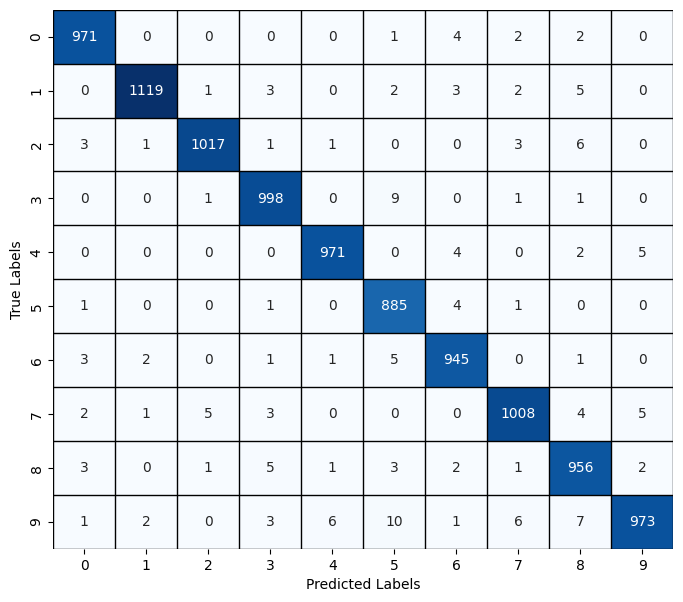

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, cnn_predictions)
plt.figure(figsize=(8, 7))

# Heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=range(10), yticklabels=range(10))

# Labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

for i in range(11):
    plt.hlines(i, xmin=0, xmax=10, colors="black", linestyles="solid", linewidth=1)
    plt.vlines(i, ymin=0, ymax=10, colors="black", linestyles="solid", linewidth=1)


plt.show()

### Salvando a rede neural

In [8]:
with open("../models/cnn.pkl", "wb") as f:
    pickle.dump(cnn, f)